CML effect: comparison with PBS data

**Table of content**
1. [Prepare data](#Prepare-data)
2. [Differential expression analysis](#Differential-expression-analysis)
3. [Z-scores of CML vs PBS DEGs in non CML / PBS samples](#Z-scores-of-CML-vs-PBS-DEGs-in-non-CML-/-PBS-samples)
4. [Volcano plots for SPF vs GF highlighting DEG in CML vs PBS](#Volcano-plots-for-SPF-vs-GF-highlighting-DEG-in-CML-vs-PBS)
    
*Generated from a Jupyter Notebook - [Sources](https://github.com/bebatut/neuromac_GF_mices/blob/master/src/microbiote-effect-age-sex.ipynb)*

# Load

In [1]:
source("load_libraries.R")

Warning message:
“package ‘reshape2’ was built under R version 3.6.3”
Warning message:
“package ‘XML’ was built under R version 3.6.3”


Allowing multi-threading with up to 4 threads.


Warning message:
“package ‘reshape’ was built under R version 3.6.3”
Warning message:
“package ‘plotly’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘factoextra’ was built under R version 3.6.3”
Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...



In [2]:
source("functions.R")

Load the gene length

In [3]:
gene_length = read.csv("../data/gene_length.tabular", sep="\t", h = F) %>%
    rename('length' = 'V2') %>%
    rename('gene' = 'V1')

Load the count table

In [4]:
counts = read.csv("../data/cml_pbs_counts.tabular", sep="\t") %>%
    rename('gene' = 'X.KEY')

In [5]:
dir_path = '../results/dge/cml-effect/'

# Prepare data

Rename columns due to confusion in labelling of FastQ files

In [6]:
counts = counts %>%
    rename('CML-1' = 'PBS_3') %>%
    rename('CML-2' = 'PBS_4') %>%
    rename('CML-3' = 'CML_2') %>%
    rename('CML-4' = 'PBS_1') %>%
    rename('PBS-1' = 'PBS_2') %>%
    rename('PBS-2' = 'CML_4') %>%
    rename('PBS-3' = 'CML_3') %>%
    rename('PBS-4' = 'CML_1') %>%
    select(c('gene', 'CML-1', 'CML-2', 'CML-3', 'CML-4', 'PBS-1', 'PBS-2', 'PBS-3', 'PBS-4'))

In [7]:
counts

gene,CML-1,CML-2,CML-3,CML-4,PBS-1,PBS-2,PBS-3,PBS-4
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,4,3,2,3,2,2,12,9
0610007P14Rik,843,599,726,711,529,524,703,676
0610009B22Rik,1252,786,966,894,946,1014,1254,1066
0610009L18Rik,58,49,70,67,42,62,23,40
0610009O20Rik,228,306,375,257,271,371,428,377
0610010B08Rik,0,0,0,0,0,0,0,0
0610010F05Rik,367,566,453,477,551,432,798,562
0610010K14Rik,1382,1382,1185,1369,1356,1507,1362,1459
0610011F06Rik,188,130,215,148,153,98,168,152


## Check data

In [8]:
head(counts)

,gene,CML-1,CML-2,CML-3,CML-4,PBS-1,PBS-2,PBS-3,PBS-4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0610005C13Rik,4,3,2,3,2,2,12,9
2,0610007P14Rik,843,599,726,711,529,524,703,676
3,0610009B22Rik,1252,786,966,894,946,1014,1254,1066
4,0610009L18Rik,58,49,70,67,42,62,23,40
5,0610009O20Rik,228,306,375,257,271,371,428,377
6,0610010B08Rik,0,0,0,0,0,0,0,0


Percentage of gene names in count file that are in gene length file

In [9]:
100 * sum(counts$gene %in% gene_length$gene)/length(counts$gene)

[1] 100

Percentage of gene names in ene length file that are in count file

In [10]:
100 * sum(gene_length$gene %in% counts$gene)/length(gene_length$gene)

[1] 100

## Remove spurious data

Remove the rows with only zeros (printed: before / after)

In [11]:
dim(counts)

[1] 24421     9

In [12]:
counts = counts %>%
    mutate(sumVar = rowSums(.[2:9])) %>%
    filter(sumVar > 1) %>%
    select(-sumVar)

In [13]:
dim(counts)

[1] 15305     9

## Check and clean genes names

Rename the genes to be sure there is a map with Entrez Gene Identifers:

In [14]:
cml_counts = counts

In [15]:
# Extract mapping new names
load("../results/dge/prepared_counts.RData")
prepared_counts = counts %>%
    rownames_to_column('gene')
original_counts = read.csv("../data/counts.tabular", sep="\t") %>%
    rename('gene' = 'Gene') %>%
    select(names(prepared_counts)) %>%
    mutate(sumVar = rowSums(.[2:62])) %>%
    filter(sumVar > 1) %>%
    select(-sumVar)
in_orig_not_in_prep_counts = dplyr::setdiff(original_counts, prepared_counts)
in_prep_not_in_orig_counts = dplyr::setdiff(prepared_counts, original_counts)
if(identical(in_orig_not_in_prep_counts$"GF_104w_F_1_2", in_prep_not_in_orig_counts$"GF_104w_F_1_2")){
    new_names = dplyr::tibble(gene = in_orig_not_in_prep_counts$gene, new = in_prep_not_in_orig_counts$gene)}
head(new_names)

gene,new
<chr>,<chr>
0610011F06Rik,Mettl26
1110001J03Rik,Fmc1
1110007C09Rik,Card19
1190002F15Rik,Lockd
1200014J11Rik,Ncbp3
1500012F01Rik,Zfas1


In [16]:
rename_genes = function(table, mapping, col_to_check){
    tmp_table = dplyr::full_join(table, mapping, by = "gene") %>%
        filter(!is.na(.[,col_to_check]))
    correct_name_table = tmp_table %>%
        filter(is.na(new)) %>%
        select(-new)
    to_correct_name_table = tmp_table %>%
        filter(!is.na(new)) %>%
        select(-gene) %>%
        rename(gene = new)
    return(dplyr::union(correct_name_table, to_correct_name_table))
}

In [17]:
# Apply the mapping to rename genes on count table
counts = rename_genes(cml_counts, new_names, 2)
dim(counts)

[1] 15305     9

In [18]:
# Apply the mapping to rename genes on gene length table
# and filter to keep the same names as in count table
gene_length = rename_genes(gene_length, new_names, 2) %>%
    filter(gene %in% counts$gene)
dim(gene_length)

[1] 15305     2

## Create metadata

Extract the description of the samples

In [19]:
samples_names = names(counts %>% select(-gene))
metadata = as_tibble(t(sapply(sapply(samples_names, strsplit, split = "-"), unlist))) %>%
    mutate(sample = samples_names) %>%
    rename(treatment = V1) %>%
    rename(replicate = V2) 
metadata

Warning message:
“The `x` argument of `as_tibble.matrix()` must have column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


treatment,replicate,sample
<chr>,<chr>,<chr>
CML,1,CML-1
CML,2,CML-2
CML,3,CML-3
CML,4,CML-4
PBS,1,PBS-1
PBS,2,PBS-2
PBS,3,PBS-3
PBS,4,PBS-4


# Differential expression analysis

In [20]:
count_mat = as.matrix(counts %>% select(-gene))
rownames(count_mat) = counts$gene
head(count_mat)

,CML-1,CML-2,CML-3,CML-4,PBS-1,PBS-2,PBS-3,PBS-4
0610005C13Rik,4,3,2,3,2,2,12,9
0610007P14Rik,843,599,726,711,529,524,703,676
0610009B22Rik,1252,786,966,894,946,1014,1254,1066
0610009L18Rik,58,49,70,67,42,62,23,40
0610009O20Rik,228,306,375,257,271,371,428,377
0610010F05Rik,367,566,453,477,551,432,798,562


Construct DESeqDataSet

In [21]:
dds = DESeqDataSetFromMatrix(
        countData = count_mat,
        colData = metadata,
        design = ~ treatment)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [22]:
# organize levels of the factor (PBS being the reference)
dds$treatment = relevel(dds$treatment, ref="PBS")

## Testing how the complexification of the model explain the data

% genes with significant LRT adjusted p-value for the model with treatment as factor compared to a model without any factors

In [23]:
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
100*nb/dim(LRT_res)[1]

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] 0.2221496

## Exploratory analysis and visualization

We use here the variance stabilizing transformation 

In [24]:
vsd = vst(dds, blind = FALSE)

Distances between the samples

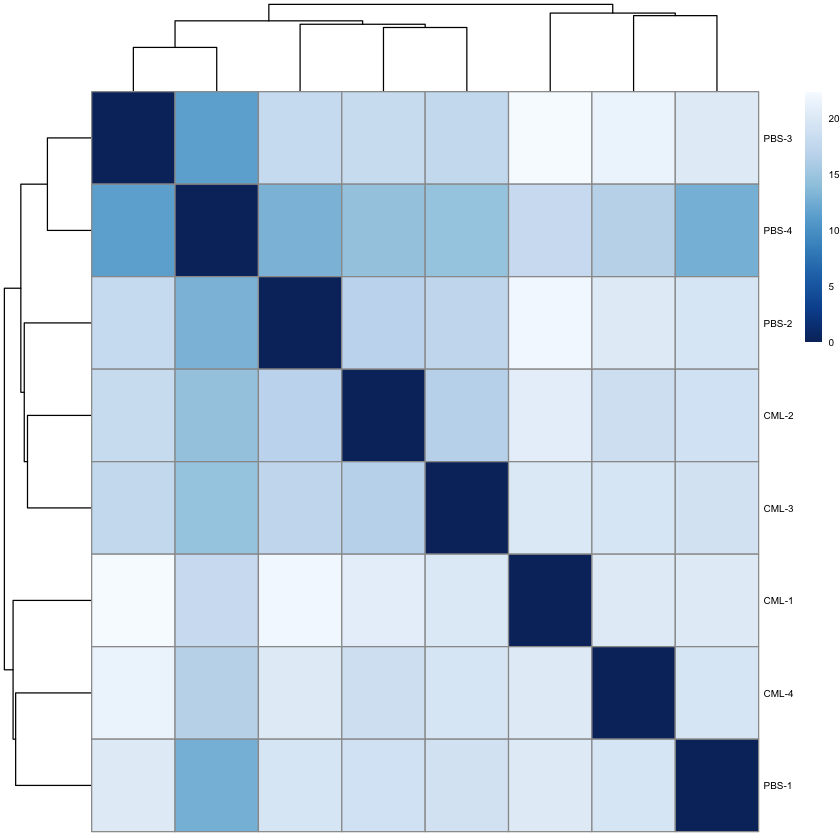

In [25]:
sampleDists = dist(t(assay(vsd)))
sampleDistMatrix = as.matrix( sampleDists )
colnames(sampleDistMatrix) = NULL
colors = colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         fontsize = 6)

PCA plot 

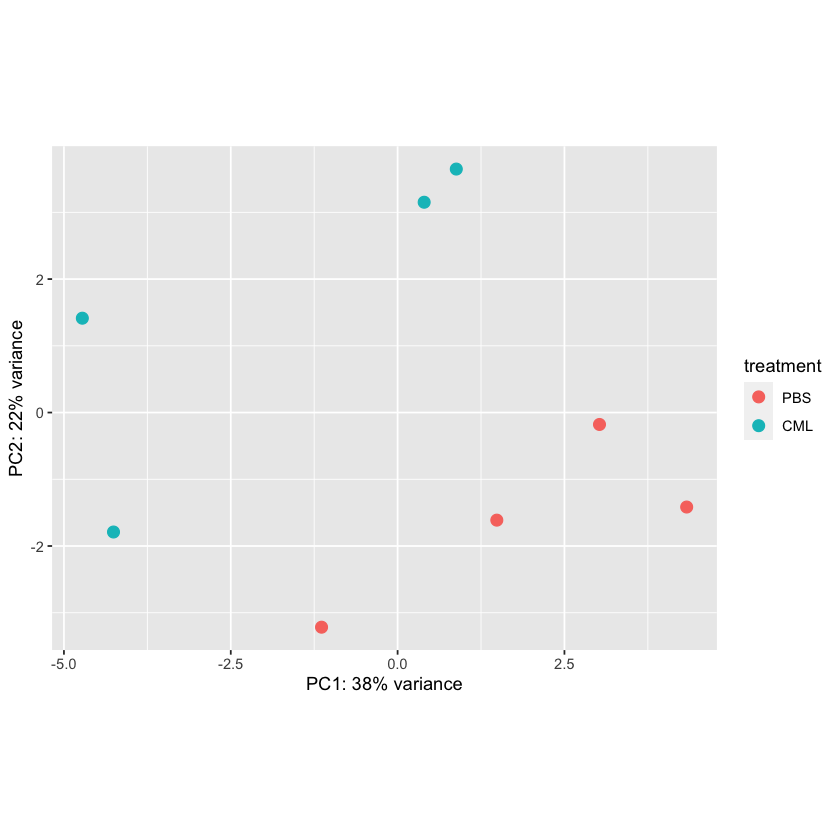

In [26]:
pcaData = plotPCA(vsd, intgroup = c("treatment"), returnData = TRUE)
percentVar = round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(x = PC1, y = PC2, color = treatment)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()

## Differential expression analysis

In [27]:
dge = DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



Extract the normalized counts

In [28]:
norm_counts = counts(dge, normalized = TRUE)

## Extraction of the differentially expressed genes

In [29]:
sign_adj_pvalue = 0.05

Extract results

In [30]:
res = results(dge, alpha=0.05, test="Wald")
deg_results = as.data.frame(res) %>%
        rownames_to_column('gene')

In [31]:
norm_counts = as.data.frame(norm_counts) %>%
    rownames_to_column('gene')

### DEG with abs(FC) > 1.5

In [32]:
sign_fc = 1.5
deg1 = deg_results %>%
    filter(padj < sign_adj_pvalue & abs(log2FoldChange) >= log2(sign_fc))

Genes with significant p-values and abs(FC) > 1.5

In [33]:
deg1$gene

[1] "2810013P06Rik" "4833419F23Rik" "A430033K04Rik" "AI854703"     
 [5] "Atad2"         "C4b"           "Ccl22"         "Cenpe"        
 [9] "Cers4"         "Chic1"         "Chil3"         "F630028O10Rik"
[13] "Fos"           "Gbp6"          "Glb1l"         "Gm5420"       
[17] "Hsph1"         "Igf2bp2"       "Ipo4"          "Itpr3"        
[21] "Kcna7"         "Ltf"           "Maob"          "N4bp3"        
[25] "Nek5"          "Ngp"           "Pglyrp1"       "Rora"         
[29] "S100a8"        "S100a9"        "Scai"          "Sema3c"       
[33] "Setx"          "Sh2d5"         "She"           "Snap91"       
[37] "Snhg17"        "Tle6"          "Ttc37"         "Vat1l"        
[41] "Wdr5b"         "Zfp414"        "Zkscan2"

In [34]:
length(deg1$gene)

[1] 43

In [35]:
deg1 = deg1 %>%
    left_join(norm_counts, by='gene') %>%
    select(-c(baseMean, lfcSE, stat, pvalue))

In [36]:
deg1 %>% write.table(file = paste(dir_path, 'high_fc_deg.csv'), sep="\t", quote=F, row.names=F)

In [37]:
deg1 %>%
    left_join(norm_counts, by='gene')

gene,log2FoldChange,padj,CML-1.x,CML-2.x,CML-3.x,CML-4.x,PBS-1.x,PBS-2.x,PBS-3.x,PBS-4.x,CML-1.y,CML-2.y,CML-3.y,CML-4.y,PBS-1.y,PBS-2.y,PBS-3.y,PBS-4.y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2810013P06Rik,0.7895123,3.850348e-02,1017.184367,559.331505,941.472284,845.253627,358.434481,567.150127,548.252218,470.7612415,1017.184367,559.331505,941.472284,845.253627,358.434481,567.150127,548.252218,470.7612415
4833419F23Rik,4.1105653,1.905729e-02,11.336401,50.196417,31.914315,14.401438,0.000000,2.040108,3.088745,0.8983993,11.336401,50.196417,31.914315,14.401438,0.000000,2.040108,3.088745,0.8983993
A430033K04Rik,0.6319824,2.728739e-02,556.514243,547.038505,629.775810,665.789554,472.874406,340.698098,393.814974,341.3917400,556.514243,547.038505,629.775810,665.789554,472.874406,340.698098,393.814974,341.3917400
AI854703,-6.2457069,7.883005e-03,1.030582,0.000000,0.000000,0.000000,28.070170,44.882384,3.860931,20.6631843,1.030582,0.000000,0.000000,0.000000,28.070170,44.882384,3.860931,20.6631843
Atad2,-0.9471494,4.649729e-02,207.146968,174.150835,388.290829,196.081117,503.103820,416.182108,529.719749,412.3652860,207.146968,174.150835,388.290829,196.081117,503.103820,416.182108,529.719749,412.3652860
C4b,-2.1075094,7.050800e-07,94.813538,150.589251,121.274396,58.713555,328.205067,348.858532,738.982215,416.8572826,94.813538,150.589251,121.274396,58.713555,328.205067,348.858532,738.982215,416.8572826
Ccl22,-3.3443467,3.882241e-02,8.244655,22.537167,3.191431,0.000000,23.751682,216.251487,40.153684,66.4815494,8.244655,22.537167,3.191431,0.000000,23.751682,216.251487,40.153684,66.4815494
Cenpe,-5.9649110,1.105178e-02,0.000000,0.000000,1.063810,0.000000,10.796219,39.782113,11.582793,17.9679863,0.000000,0.000000,1.063810,0.000000,10.796219,39.782113,11.582793,17.9679863
Cers4,1.6496472,9.173821e-03,91.721792,134.198584,93.615323,85.300825,19.433195,46.922493,28.570890,34.1391740,91.721792,134.198584,93.615323,85.300825,19.433195,46.922493,28.570890,34.1391740


### DEG with abs(FC) > 0.58

In [38]:
sign_fc = 0.58
deg2 = deg_results %>%
    filter(padj < sign_adj_pvalue & abs(log2FoldChange) >= log2(sign_fc))

Genes with significant p-values and abs(FC) > 1.5

In [39]:
deg2$gene

[1] "2810013P06Rik" "4833419F23Rik" "A430033K04Rik" "AI854703"     
 [5] "Alkbh4"        "Atad2"         "Atp7a"         "C4b"          
 [9] "Ccl22"         "Cenpe"         "Cers4"         "Chic1"        
[13] "Chil3"         "Clk1"          "Dcun1d4"       "F630028O10Rik"
[17] "Fos"           "Gbp6"          "Glb1l"         "Gm5420"       
[21] "Hsph1"         "Igf2bp2"       "Ipo4"          "Itpr3"        
[25] "Kcna7"         "Ltf"           "Maob"          "N4bp3"        
[29] "Nek5"          "Ngp"           "Npnt"          "Pacs2"        
[33] "Pglyrp1"       "Rora"          "S100a8"        "S100a9"       
[37] "Scai"          "Sema3c"        "Setx"          "Sh2d5"        
[41] "She"           "Slc39a8"       "Snap91"        "Snhg17"       
[45] "Tbc1d23"       "Tle6"          "Ttc37"         "Unk"          
[49] "Usp7"          "Vat1l"         "Wdr5b"         "Xpo1"         
[53] "Xpo7"          "Zfp414"        "Zkscan2"

In [40]:
length(deg2$gene)

[1] 55

## Comparison with DEG extracted by Omar

In [41]:
cml_pbs_deg = read.csv("../data/cml_pbs_deg.tabular", sep="\t")
cml_pbs_deg$Gene

[1] "S100a8"        "Ngp"           "Ltf"           "Camp"         
 [5] "Chil3"         "Lcn2"          "S100a9"        "C4b"          
 [9] "Farp1"         "Cd177"         "Vsig10"        "Cers4"        
[13] "Ttc37"         "Hspa1b"        "Rabl3"         "Itpr3"        
[17] "Foxn2"         "Zfp414"        "Gm26917"       "4933417C20Rik"
[21] "Gm37298"       "Hsph1"         "Gm37352"       "Uprt"         
[25] "4930518I15Rik" "Gm43984"

DEG from Omar's data

In [42]:
cml_pbs_deg$Gene

[1] "S100a8"        "Ngp"           "Ltf"           "Camp"         
 [5] "Chil3"         "Lcn2"          "S100a9"        "C4b"          
 [9] "Farp1"         "Cd177"         "Vsig10"        "Cers4"        
[13] "Ttc37"         "Hspa1b"        "Rabl3"         "Itpr3"        
[17] "Foxn2"         "Zfp414"        "Gm26917"       "4933417C20Rik"
[21] "Gm37298"       "Hsph1"         "Gm37352"       "Uprt"         
[25] "4930518I15Rik" "Gm43984"

In [43]:
length(cml_pbs_deg$Gene)

[1] 26

Number of DEG with significant p-values and abs(FC) > 1.5 that are in DEG extracted by Omar

In [44]:
sum(deg1$gene %in% cml_pbs_deg$Gene)

[1] 11

Number of DEG with significant p-values and abs(FC) > 0.58 that are in DEG extracted by Omar

In [45]:
sum(deg2$gene %in% cml_pbs_deg$Gene)

[1] 11

Investigation of Omar's data

In [46]:
omar = cml_pbs_deg %>%
    arrange(Gene) %>%
    rename(gene = Gene) %>%
    select(-c(Base.mean, StdErr, Wald.Stats, P.value))
my = deg_results %>%
    left_join(norm_counts, by='gene') %>%
    select(-c(baseMean, lfcSE, stat, pvalue))
joint_data = dplyr::left_join(omar, my, by = "gene") %>%
    mutate('deg' = (padj < sign_adj_pvalue & abs(log2FoldChange) >= log2(sign_fc)))

In [47]:
joint_data

gene,log2.FC.,P.adj,PBS_1,PBS_2,PBS_3,PBS_4,CML_1,CML_2,CML_3,⋯,padj,CML-1,CML-2,CML-3,CML-4,PBS-1,PBS-2,PBS-3,PBS-4,deg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
4930518I15Rik,0.5813053,5.196073e-03,41.40551,66.635105,71.80520,6.866336e+01,138.75066,139.39492,112.43590,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4933417C20Rik,0.5930864,2.684696e-03,17.43390,19.477954,14.82934,1.373267e+01,46.93037,42.33475,82.73585,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C4b,-0.9462081,1.110000e-08,327.97521,345.477393,736.78381,4.211353e+02,90.80007,147.65536,119.86091,⋯,7.050800e-07,94.81354,150.58925,121.27440,58.71355,328.20507,348.858532,738.98222,416.8572826,TRUE
Camp,1.5316696,9.590000e-28,0.00000,0.000000,0.00000,0.000000e+00,142.83157,440.90097,363.82559,⋯,5.449817e-02,144.28147,438.45034,364.88700,0.00000,0.00000,0.000000,0.00000,0.0000000,FALSE
Cd177,0.6177664,7.040000e-06,0.00000,0.000000,0.00000,0.000000e+00,33.66744,47.49753,126.22521,⋯,1.431517e-01,34.00920,48.14758,131.91250,0.00000,0.00000,0.000000,0.00000,0.0000000,FALSE
Cers4,0.7468119,6.390000e-05,39.22627,46.131996,28.87818,4.119802e+01,90.80007,160.04602,94.40373,⋯,9.173821e-03,91.72179,134.19858,93.61532,85.30082,19.43319,46.922493,28.57089,34.1391740,TRUE
Chil3,1.2554221,1.500000e-19,0.00000,1.025155,0.00000,0.000000e+00,108.14390,391.33833,394.58636,⋯,1.582415e-02,116.45576,413.86434,435.09849,0.00000,0.00000,1.020054,0.00000,0.0000000,TRUE
Farp1,-0.8042760,5.820000e-06,141.65042,101.490391,139.70795,1.052838e+02,46.93037,43.36731,45.61079,⋯,1.613429e-01,48.43735,43.02550,45.74385,93.05545,140.35085,100.985364,136.67696,104.2143206,FALSE
Foxn2,-0.6160310,1.008326e-03,452.19174,419.288587,668.10057,4.595868e+02,254.03614,273.62707,213.20392,⋯,8.481716e-02,210.23871,246.88442,179.78397,412.10269,451.28197,398.841187,639.37019,452.7932552,FALSE


In [48]:
joint_data %>%
    select(c(gene, log2.FC., P.adj, log2FoldChange, padj, deg)) 

gene,log2.FC.,P.adj,log2FoldChange,padj,deg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
4930518I15Rik,0.5813053,5.196073e-03,NA,NA,NA
4933417C20Rik,0.5930864,2.684696e-03,NA,NA,NA
C4b,-0.9462081,1.110000e-08,-2.1075094,7.050800e-07,TRUE
Camp,1.5316696,9.590000e-28,10.4278723,5.449817e-02,FALSE
Cd177,0.6177664,7.040000e-06,8.2816908,1.431517e-01,FALSE
Cers4,0.7468119,6.390000e-05,1.6496472,9.173821e-03,TRUE
Chil3,1.2554221,1.500000e-19,9.7334149,1.582415e-02,TRUE
Farp1,-0.8042760,5.820000e-06,-1.0688361,1.613429e-01,FALSE
Foxn2,-0.6160310,1.008326e-03,-0.8902990,8.481716e-02,FALSE


In [49]:
joint_data %>%
    select(-c(log2.FC., P.adj, log2FoldChange, padj))

gene,PBS_1,PBS_2,PBS_3,PBS_4,CML_1,CML_2,CML_3,CML_4,CML-1,CML-2,CML-3,CML-4,PBS-1,PBS-2,PBS-3,PBS-4,deg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
4930518I15Rik,41.40551,66.635105,71.80520,6.866336e+01,138.75066,139.39492,112.43590,120.25027,NA,NA,NA,NA,NA,NA,NA,NA,NA
4933417C20Rik,17.43390,19.477954,14.82934,1.373267e+01,46.93037,42.33475,82.73585,52.74135,NA,NA,NA,NA,NA,NA,NA,NA,NA
C4b,327.97521,345.477393,736.78381,4.211353e+02,90.80007,147.65536,119.86091,125.52441,94.81354,150.58925,121.27440,58.71355,328.20507,348.858532,738.98222,416.8572826,TRUE
Camp,0.00000,0.000000,0.00000,0.000000e+00,142.83157,440.90097,363.82559,298.51603,144.28147,438.45034,364.88700,0.00000,0.00000,0.000000,0.00000,0.0000000,FALSE
Cd177,0.00000,0.000000,0.00000,0.000000e+00,33.66744,47.49753,126.22521,54.85100,34.00920,48.14758,131.91250,0.00000,0.00000,0.000000,0.00000,0.0000000,FALSE
Cers4,39.22627,46.131996,28.87818,4.119802e+01,90.80007,160.04602,94.40373,146.62095,91.72179,134.19858,93.61532,85.30082,19.43319,46.922493,28.57089,34.1391740,TRUE
Chil3,0.00000,1.025155,0.00000,0.000000e+00,108.14390,391.33833,394.58636,296.40638,116.45576,413.86434,435.09849,0.00000,0.00000,1.020054,0.00000,0.0000000,TRUE
Farp1,141.65042,101.490391,139.70795,1.052838e+02,46.93037,43.36731,45.61079,45.35756,48.43735,43.02550,45.74385,93.05545,140.35085,100.985364,136.67696,104.2143206,FALSE
Foxn2,452.19174,419.288587,668.10057,4.595868e+02,254.03614,273.62707,213.20392,319.61257,210.23871,246.88442,179.78397,412.10269,451.28197,398.841187,639.37019,452.7932552,FALSE


# Z-scores

In [50]:
plot_z_score_heatmap = function(de_genes, fp){
    de_genes = de_genes[de_genes %in% rownames(z_scores)]
    data = z_scores[de_genes,]
    hc = hclust(dist(data[,order]), method = "complete")
    xx = pheatmap(data[hc$order, order],
            cluster_rows=F,
            cluster_cols=F,
            show_rownames=T,
            show_colnames=F,
            annotation_col=annot,
            annotation_row=NULL,
            annotation_colors = annot_colors,
            color=rev(brewer.pal(11, "RdBu")),
            breaks = seq(-3.5, 3.5, length=12),
            main = "DE genes in CML vs PBS")
    pdf(fp)
    grid::grid.newpage()
    grid::grid.draw(xx$gtable)
    dev.off()
}

## in CML / PBS samples

In [51]:
z_scores = t(scale(t(norm_counts %>% select(-gene))))
rownames(z_scores) = norm_counts$gene
head(z_scores)

,CML-1,CML-2,CML-3,CML-4,PBS-1,PBS-2,PBS-3,PBS-4
0610005C13Rik,-0.05393378,-0.4252086,-0.7598723,-0.3366759,-0.74868080,-0.7908436,1.7665254,1.3486896
0610007P14Rik,1.61285921,-0.3799321,0.8595406,0.9792030,-0.71190591,-0.9978470,-0.9327221,-0.4291956
0610009B22Rik,2.07198126,-1.5384334,0.1171830,-0.1601688,0.07015591,0.1670043,-0.3243114,-0.4034110
0610009L18Rik,0.36706103,-0.1242125,1.1207439,1.1082310,-0.37311316,0.5450361,-1.7880381,-0.8557082
0610009O20Rik,-1.64617942,-0.1533638,1.4717841,-0.7004110,-0.55070514,1.0821471,0.1703862,0.3263420
0610010F05Rik,-1.68709280,0.7881944,-0.4140327,0.1571092,0.97300756,-0.9204291,1.2349425,-0.1316990


In [52]:
annot = metadata %>% select(treatment) %>% as.data.frame
rownames(annot) = metadata$sample
annot_colors = list()
annot_colors$treatment = c("#65ce41","#c3a7f9")
names(annot_colors$treatment) = c("CML", "PBS")
order = metadata$sample

DEGs for CML vs PBS (abs(FC) > 1.5)

In [53]:
deg1$gene

[1] "2810013P06Rik" "4833419F23Rik" "A430033K04Rik" "AI854703"     
 [5] "Atad2"         "C4b"           "Ccl22"         "Cenpe"        
 [9] "Cers4"         "Chic1"         "Chil3"         "F630028O10Rik"
[13] "Fos"           "Gbp6"          "Glb1l"         "Gm5420"       
[17] "Hsph1"         "Igf2bp2"       "Ipo4"          "Itpr3"        
[21] "Kcna7"         "Ltf"           "Maob"          "N4bp3"        
[25] "Nek5"          "Ngp"           "Pglyrp1"       "Rora"         
[29] "S100a8"        "S100a9"        "Scai"          "Sema3c"       
[33] "Setx"          "Sh2d5"         "She"           "Snap91"       
[37] "Snhg17"        "Tle6"          "Ttc37"         "Vat1l"        
[41] "Wdr5b"         "Zfp414"        "Zkscan2"

pdf 
  2

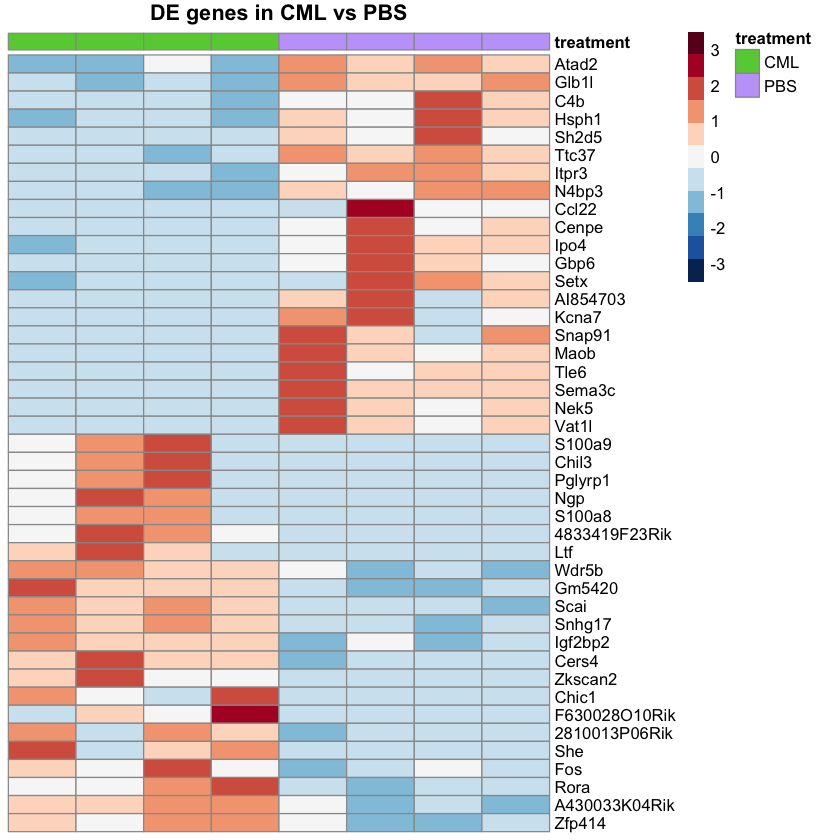

In [54]:
plot_z_score_heatmap(deg1$gene, paste(dir_path, 'z-score-cml-pbs-deg-high-fc.pdf', sep=''))

DEGs for CML vs PBS (abs(FC) > 0.58)

In [55]:
deg2$gene

[1] "2810013P06Rik" "4833419F23Rik" "A430033K04Rik" "AI854703"     
 [5] "Alkbh4"        "Atad2"         "Atp7a"         "C4b"          
 [9] "Ccl22"         "Cenpe"         "Cers4"         "Chic1"        
[13] "Chil3"         "Clk1"          "Dcun1d4"       "F630028O10Rik"
[17] "Fos"           "Gbp6"          "Glb1l"         "Gm5420"       
[21] "Hsph1"         "Igf2bp2"       "Ipo4"          "Itpr3"        
[25] "Kcna7"         "Ltf"           "Maob"          "N4bp3"        
[29] "Nek5"          "Ngp"           "Npnt"          "Pacs2"        
[33] "Pglyrp1"       "Rora"          "S100a8"        "S100a9"       
[37] "Scai"          "Sema3c"        "Setx"          "Sh2d5"        
[41] "She"           "Slc39a8"       "Snap91"        "Snhg17"       
[45] "Tbc1d23"       "Tle6"          "Ttc37"         "Unk"          
[49] "Usp7"          "Vat1l"         "Wdr5b"         "Xpo1"         
[53] "Xpo7"          "Zfp414"        "Zkscan2"

pdf 
  2

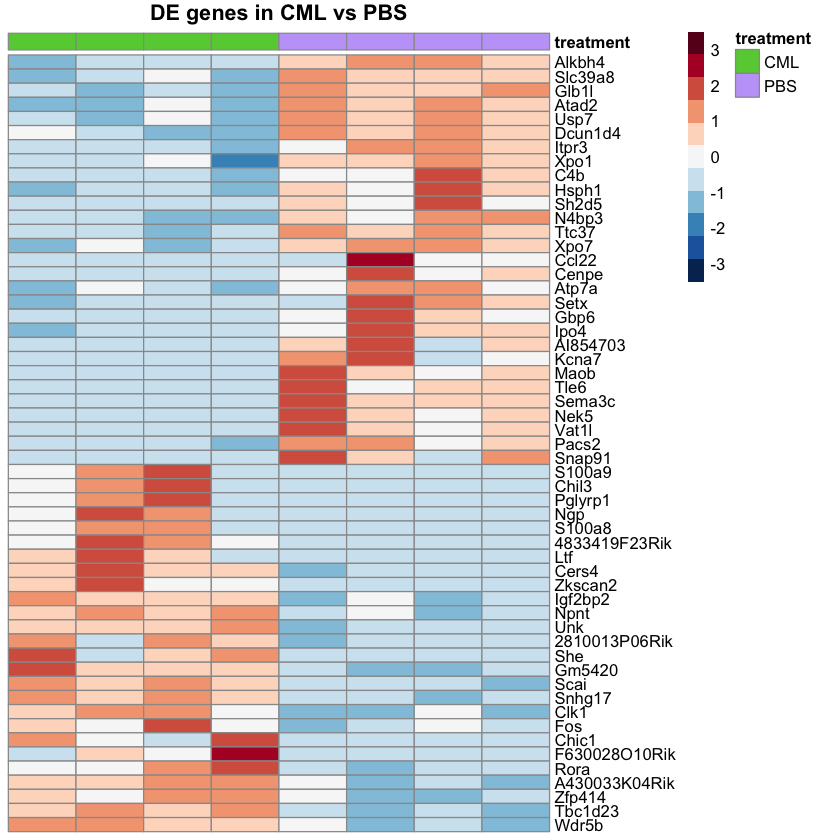

In [56]:
plot_z_score_heatmap(deg2$gene, paste(dir_path, 'z-score-cml-pbs-deg-low-fc.pdf', sep=''))

##  in non CML / PBS samples

In [57]:
load("../results/dge/filtered_z_scores.RData")
load("../results/dge/col_order.RData")
load("../results/dge/annot_col.RData")
load("../results/dge/annot_colors.RData")

In [58]:
annot = annot_col$msa %>%
    rownames_to_column('sample') %>%
    filter(Age == 'Old' ) %>%
    select(-Age)
order = col_order$msa[col_order$msa %in% annot$sample]
samples = annot$sample
annot = annot %>% select(-sample) %>% as.data.frame
rownames(annot) = samples

DEGs for CML vs PBS (abs(FC) > 1.5)

In [59]:
deg1$gene

[1] "2810013P06Rik" "4833419F23Rik" "A430033K04Rik" "AI854703"     
 [5] "Atad2"         "C4b"           "Ccl22"         "Cenpe"        
 [9] "Cers4"         "Chic1"         "Chil3"         "F630028O10Rik"
[13] "Fos"           "Gbp6"          "Glb1l"         "Gm5420"       
[17] "Hsph1"         "Igf2bp2"       "Ipo4"          "Itpr3"        
[21] "Kcna7"         "Ltf"           "Maob"          "N4bp3"        
[25] "Nek5"          "Ngp"           "Pglyrp1"       "Rora"         
[29] "S100a8"        "S100a9"        "Scai"          "Sema3c"       
[33] "Setx"          "Sh2d5"         "She"           "Snap91"       
[37] "Snhg17"        "Tle6"          "Ttc37"         "Vat1l"        
[41] "Wdr5b"         "Zfp414"        "Zkscan2"

pdf 
  2

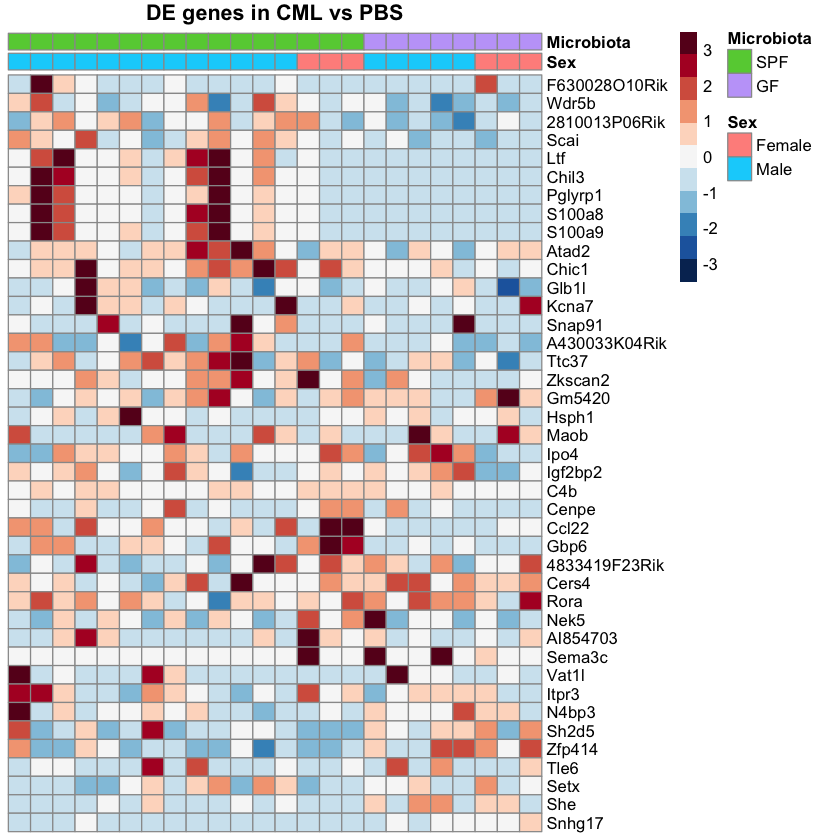

In [60]:
plot_z_score_heatmap(deg1$gene, paste(dir_path, 'z-score-deg-high-fc.pdf', sep=''))

DEGs for CML vs PBS (abs(FC) > 0.58)

pdf 
  2

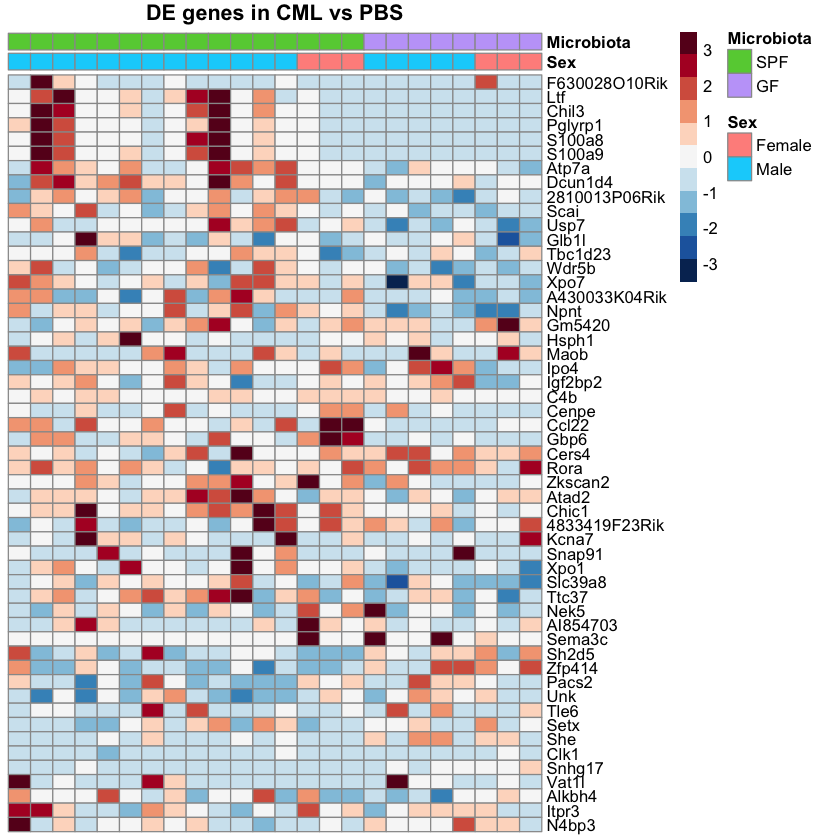

In [61]:
plot_z_score_heatmap(deg2$gene, paste(dir_path, 'z-score-deg-low-fc.pdf', sep=''))

DEGs for CML vs PBS from Omar's analysis

pdf 
  2

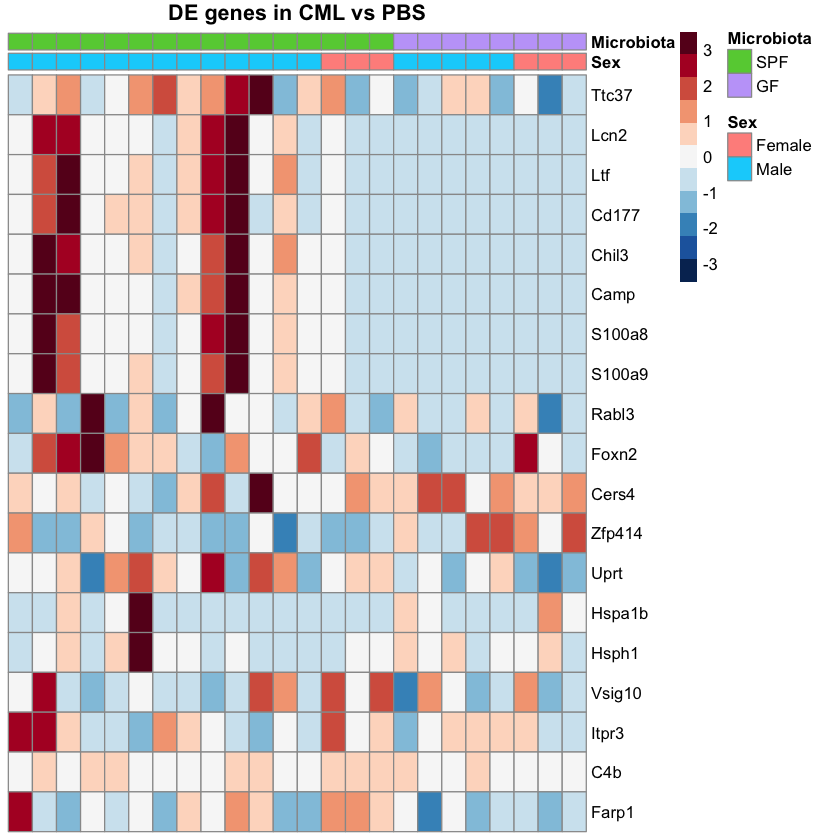

In [62]:
plot_z_score_heatmap(cml_pbs_deg$Gene, paste(dir_path, 'z-score-deg-omar.pdf', sep=''))

# Volcano plots for SPF vs GF highlighting DEG in CML vs PBS

In [63]:
load("../results/dge/microbiota-effect/microbiota-sex-age/deg_results.RData")

In [64]:
sign_fc = 1.5
sign_adj_pvalue = 0.05

In [65]:
colors = setNames(c("cornflowerblue","grey","firebrick"),c('Down', 'Non significant', 'Up'))

get_cmp_data = function(comp, deg_results, cml_pbs_deg) {
    deg_res = deg_results[[comp]] %>%
        filter(!is.na(sign_padj_and_fc)) %>%
        mutate(log2FoldChange=-log2FoldChange) %>%
        mutate(Expression=ifelse(
            sign_padj_and_fc & log2FoldChange >= log2(sign_fc),
            'Up',
            ifelse(
                sign_padj_and_fc & log2FoldChange <= -log2(sign_fc),
                'Down',
                'Non significant'))) %>%
        mutate(labels=ifelse(genes %in% cml_pbs_deg & Expression != 'Non significant', genes, "")) %>%
        select(genes, log2FoldChange, pvalue, Expression, labels)
    return(deg_res)
}

plot_volcanoplots = function(deg_res, fp) {
    my_plot = ggplot(data=deg_res, aes(log2FoldChange,-log10(pvalue))) +
        geom_point(aes(col=Expression),
            size=3) +
        scale_colour_manual(values=colors) +
        scale_fill_manual(values=colours) +
        theme(panel.grid.major=element_blank(),
            panel.grid.minor= element_blank(),
            panel.background=element_blank(),
            axis.line=element_line(colour = "black"),
            legend.key=element_blank(),
            text = element_text(size = 15)) +
        xlab("log2(Fold Change)") +
        ylab("-log10(P-Value)") +
        geom_text_repel(aes(label=labels, col=Expression),
            min.segment.length=0,
            box.padding=0.4,
            point.padding=0.4,
            show.legend=FALSE,
            size=4.5) +
        xlim(xlim[1], xlim[2]) +
        ylim(ylim[1], ylim[2])
    ggsave(fp, plot=my_plot)
    plot(my_plot)
}

## Highlighting DEGs for CML vs PBS (abs(FC) > 1.5)

In [66]:
xlim = c(-10,50)
ylim = c(0,300)

SPF vs GF (Male, Old)

Saving 7 x 7 in image

Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 28 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 28 rows containing missing values (geom_text_repel).”


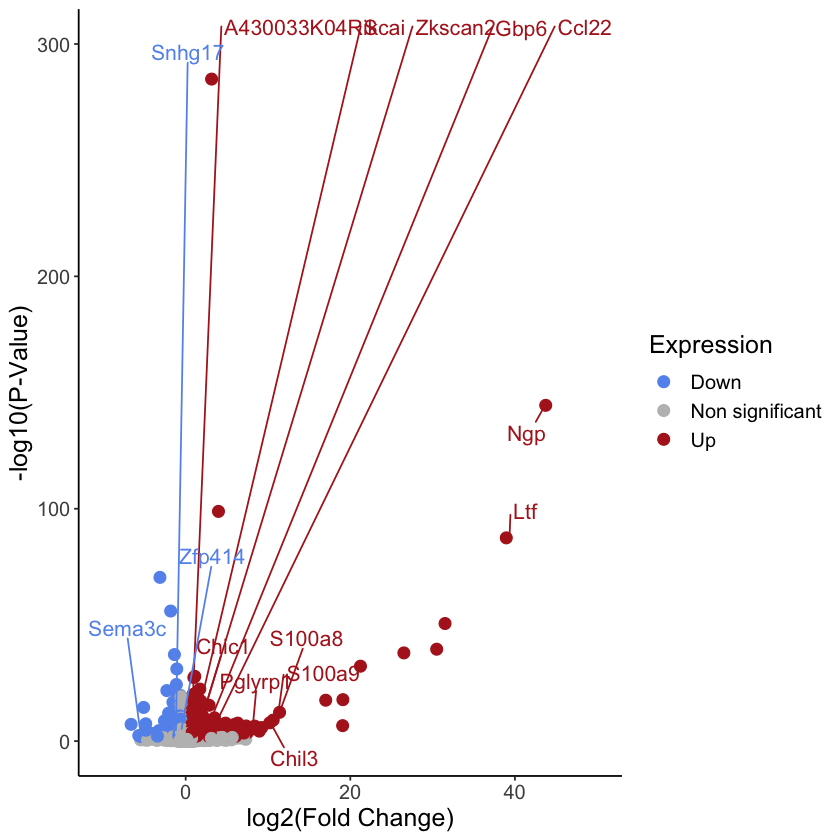

In [67]:
comp = 'GF vs SPF (Male, Old)'
deg_res = get_cmp_data(comp, deg_results, deg1$gene)
plot_volcanoplots(deg_res, paste(dir_path, 'volcanoplot-spf-gf-male-old-high-fc.pdf', sep=''))

SPF vs GF (Female, Old)

Saving 7 x 7 in image

Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_text_repel).”


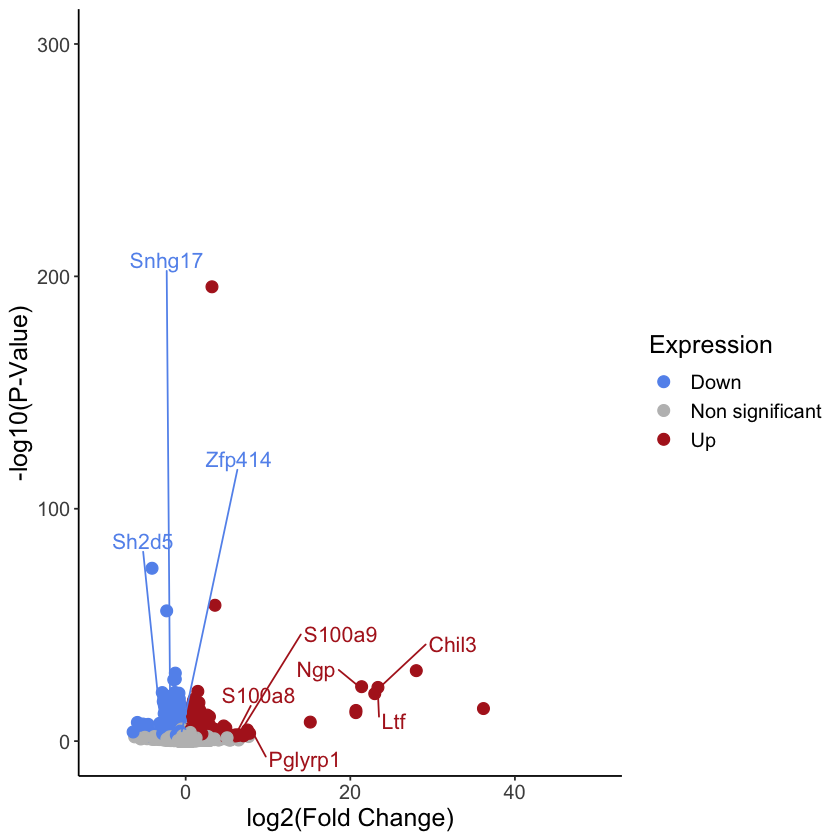

In [68]:
comp = 'GF vs SPF (Female, Old)'
deg_res = get_cmp_data(comp, deg_results, deg1$gene)
plot_volcanoplots(deg_res, paste(dir_path, 'volcanoplot-spf-gf-female-old-high-fc.pdf', sep=''))

## Highlighting DEGs for CML vs PBS (abs(FC) > 0.58)

In [69]:
xlim = c(-10,50)
ylim = c(0,300)

SPF vs GF (Male, Old)

Saving 7 x 7 in image

Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 28 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 28 rows containing missing values (geom_text_repel).”


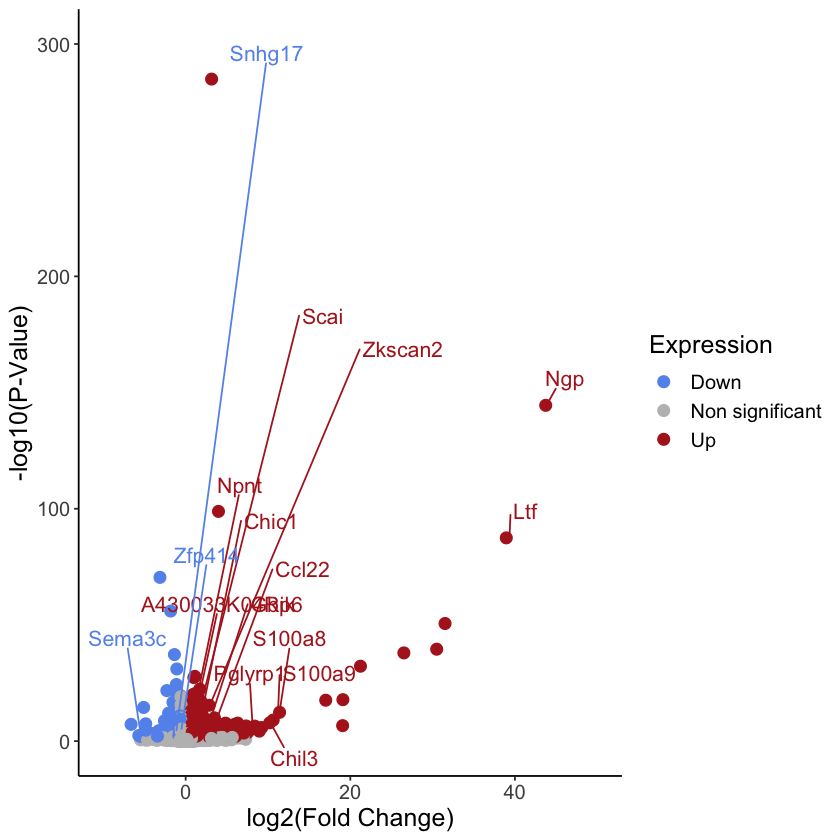

In [70]:
comp = 'GF vs SPF (Male, Old)'
deg_res = get_cmp_data(comp, deg_results, deg2$gene)
plot_volcanoplots(deg_res, paste(dir_path, 'volcanoplot-spf-gf-male-old-low-fc.pdf', sep=''))

GF vs SPF (Female, Old)

Saving 7 x 7 in image

Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_text_repel).”


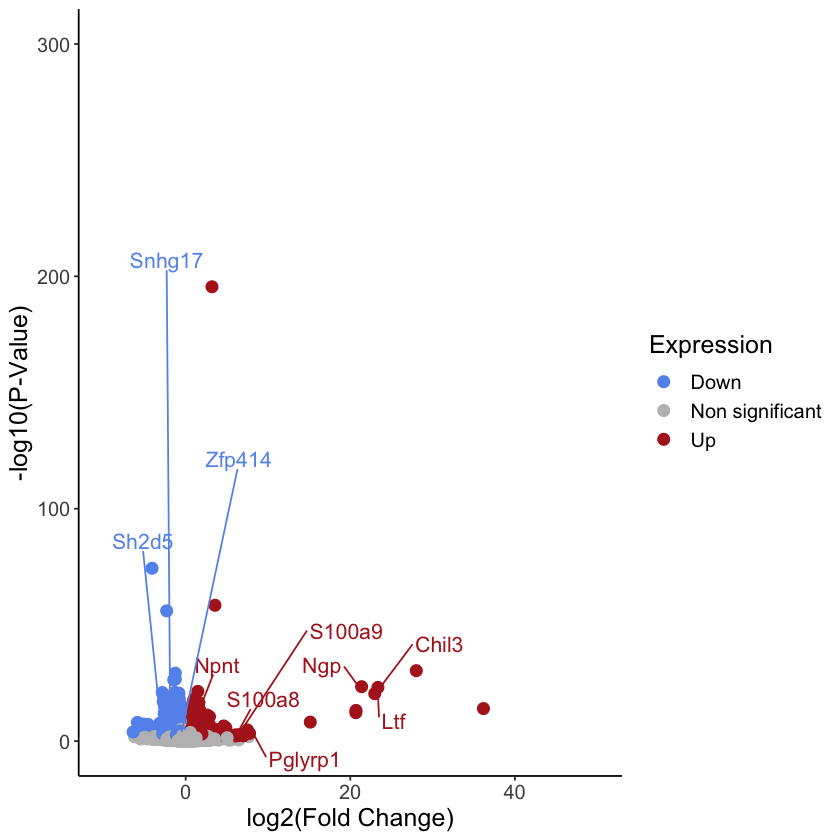

In [71]:
comp = 'GF vs SPF (Female, Old)'
deg_res = get_cmp_data(comp, deg_results, deg2$gene)
plot_volcanoplots(deg_res, paste(dir_path, 'volcanoplot-spf-gf-female-old-low-fc.pdf', sep=''))

## Highlighting DEGs for CML vs PBS from Omar's analysis

In [72]:
xlim = c(-10,50)
ylim = c(0,300)

GF vs SPF (Male, Old)

Saving 7 x 7 in image

Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 28 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 28 rows containing missing values (geom_text_repel).”


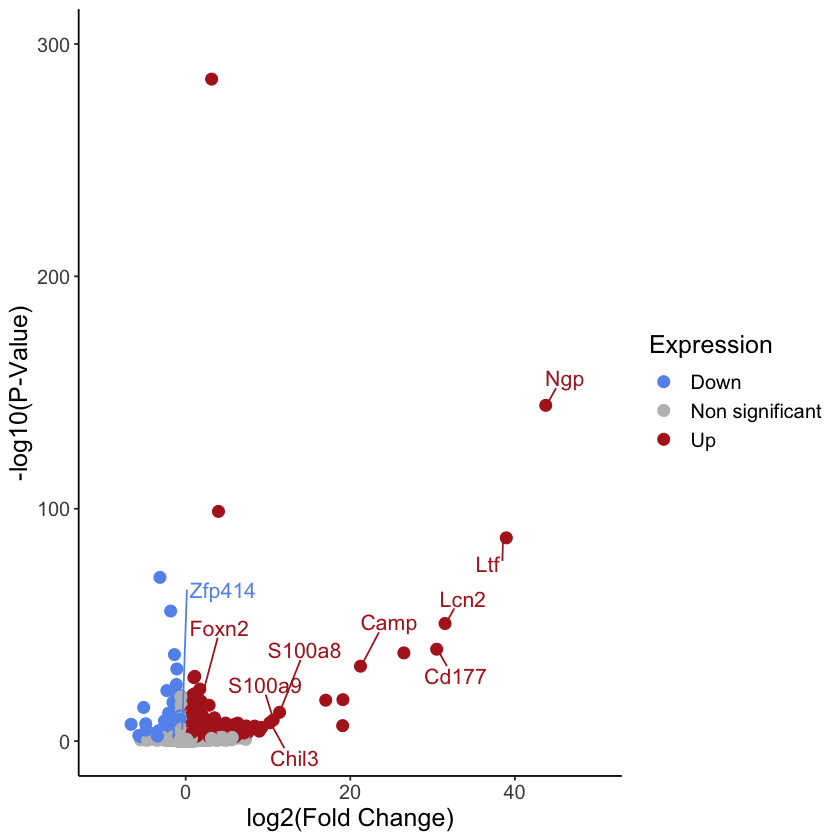

In [73]:
comp = 'GF vs SPF (Male, Old)'
deg_res = get_cmp_data(comp, deg_results, cml_pbs_deg$Gene)
plot_volcanoplots(deg_res, paste(dir_path, 'volcanoplot-spf-gf-male-old-omar.pdf', sep=''))

GF vs SPF (Female, Old)

Saving 7 x 7 in image

Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_text_repel).”


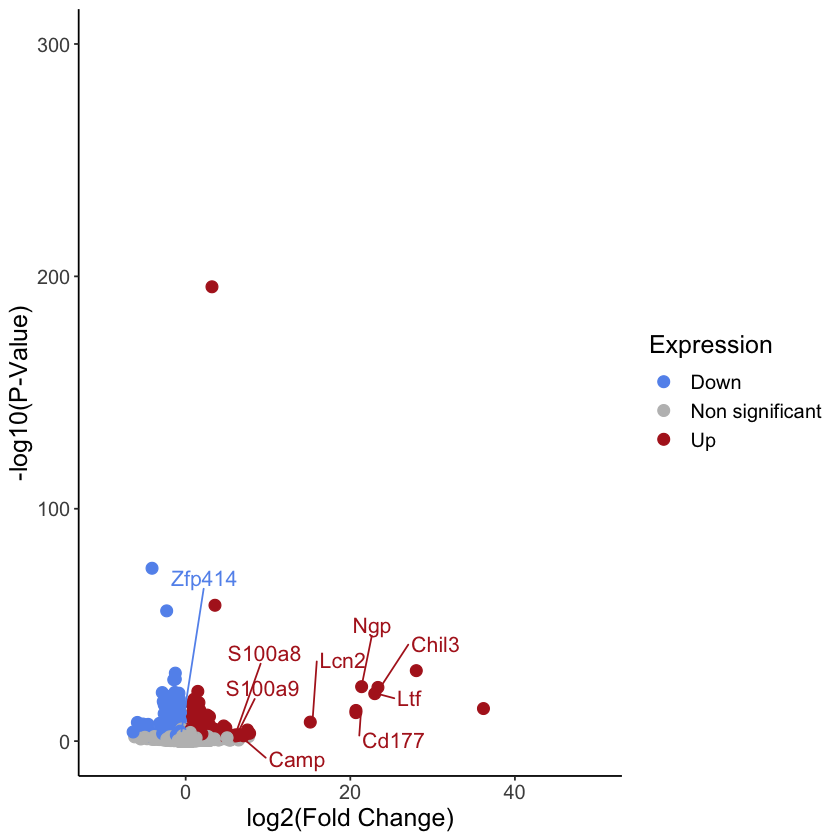

In [74]:
comp = 'GF vs SPF (Female, Old)'
deg_res = get_cmp_data(comp, deg_results, cml_pbs_deg$Gene)
plot_volcanoplots(deg_res, paste(dir_path, 'volcanoplot-spf-gf-male-old-omar.pdf', sep=''))

# Citations

In [75]:
citation("rentrez")


To cite rentrez in publications use:

  Winter, D. J. (2017) rentrez: an R package for the NCBI eUtils API
  The R Journal 9(2):520-526

A BibTeX entry for LaTeX users is

  @Article{,
    title = {{rentrez}: an R package for the NCBI eUtils API},
    author = {David J. Winter},
    journal = {The R Journal},
    year = {2017},
    volume = {9},
    issue = {2},
    pages = {520--526},
  }


In [76]:
citation("DESeq2")


  Love, M.I., Huber, W., Anders, S. Moderated estimation of fold change
  and dispersion for RNA-seq data with DESeq2 Genome Biology 15(12):550
  (2014)

A BibTeX entry for LaTeX users is

  @Article{,
    title = {Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2},
    author = {Michael I. Love and Wolfgang Huber and Simon Anders},
    year = {2014},
    journal = {Genome Biology},
    doi = {10.1186/s13059-014-0550-8},
    volume = {15},
    issue = {12},
    pages = {550},
  }
